In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Hawaii = Base.classes.keys()
Hawaii

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [65]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(text("date desc"))[0]
recent_date

('2017-08-23',)

<Axes: xlabel='Date'>

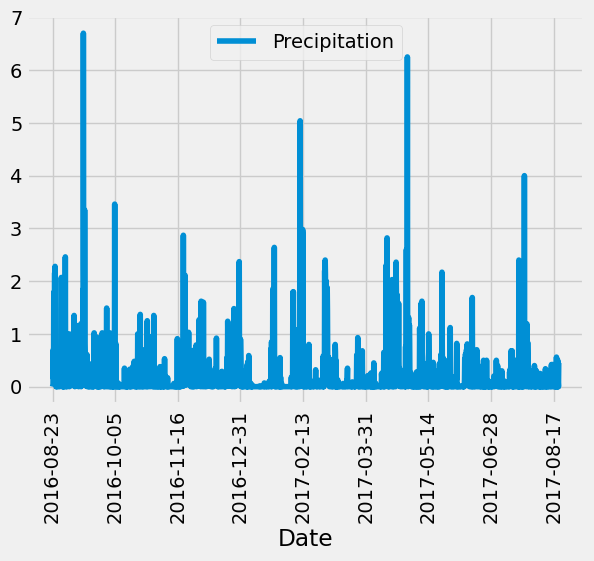

In [132]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date = dt.datetime(2017,8,23)
# Calculate the date one year from the last date in data set.
beginning = date-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(measurement.date,measurement.prcp).filter(measurement.date>=beginning.date())

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data,columns=["Date",'Precipitation']).set_index(['Date']).dropna()

# Sort the dataframe by date
precip_df.sort_values(by='Date',inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(kind='line',rot=90)

In [133]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [135]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(station.station).count()
station_count

9

In [162]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_activity = session.query(measurement.station,text("COUNT(measurement.station)")).order_by(text('count(measurement.station) DESC')).group_by(measurement.station)
for row in stations_activity:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [177]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = session.query(text('min(measurement.tobs)'),text('max(measurement.tobs) as Max'),text('avg(measurement.tobs) as Mean')).filter(measurement.station == 'USC00519281')[0]
active_station

(54.0, 85.0, 71.66378066378067)

Text(0.5, 1.0, 'Frequency of Temperature Observed at Station USC00519281')

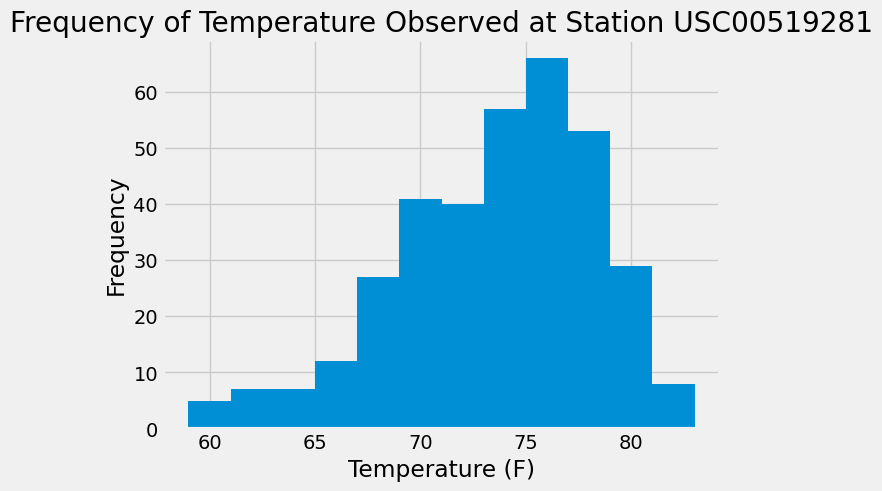

In [184]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram = pd.DataFrame(session.query(measurement.tobs).filter(measurement.date >= beginning.date()).filter(measurement.station == 'USC00519281'))
histogram.hist(bins=12)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title("Frequency of Temperature Observed at Station USC00519281")

# Close Session

In [16]:
# Close Session
session.close()